In [82]:
#MACS 30000 HW4
#Fangfang Wan
#Some answers are included as comments.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [83]:
# Simulation functions, require a simulation profile, structured as a dictionary
# p = {
#          'inc_0':       average starting income for MACSS students,
#          'sigma':       standard deviation of log(error),
#          'mu':          mean of log(error),
#          'rho':         persistance,
#          'gr':          growth rate of income,       
#          'start_yr':    start year,    
#          'working_yrs': years to work,
#          'num_draws':   number of simulations }

def income_simulation(p):
    
    #set random seed
    np.random.seed(524)
    
    #error matrix
    error_array = np.random.normal(p['mu'], p['sigma'], (p['working_yrs'], p['num_draws']))

    #create a matrix of incomes(working_yrs, num_draws)
    ln_income_mat = np.zeros((p['working_yrs'], p['num_draws']))
    
    #fill the matrix
    ln_income_mat[0, :] = np.log(p['inc_0']) + error_array[0, :]
    
    #loop and apply model
    for yr in range(1, p['working_yrs']):
        ln_income_mat[yr, :] = (1 - p["rho"]) * ((np.log(p["inc_0"])) + p["gr"] * yr) + \
                               p["rho"] * ln_income_mat[yr - 1, : ] + error_array[yr, : ]


    income_mat = np.exp(ln_income_mat)
    return income_mat

def find_pay_year_array(p):
    income_mat = income_simulation(p)
    pay_year = []
    for person_index in range(0, 10000):
        for year in range (0, 40):
            paid_income = sum(income_mat[: year + 1, person_index] )* 0.1
            if paid_income > 95000:
                year = year + 1
                pay_year.append(year)
                break
    return pay_year

def find_in_10_years_ratio(p):
    pay_year = find_pay_year_array(p)
    in_10_years_count = 0
    for year in pay_year:
        if year <= 10:
            in_10_years_count += 1
            in_10_years_ratio = in_10_years_count/p['num_draws']
    return in_10_years_ratio

Text(0,0.5,'Annual income (\\$s)')

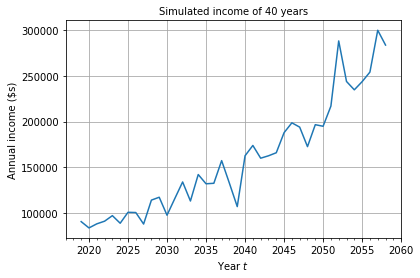

In [88]:
# Question 1
simulation_profile = {
         'inc_0':       80000,
         'sigma':       0.1,
         'mu':          0,
         'rho':         0.2,
         'gr':          0.03,
         'start_yr':    2019,
         'working_yrs': 40,
         'num_draws':   10000,
    }

income_mat = income_simulation(simulation_profile)
    
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['start_yr'], p['start_yr'] + p['working_yrs'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulated income of 40 years', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

0.0127
0.0902


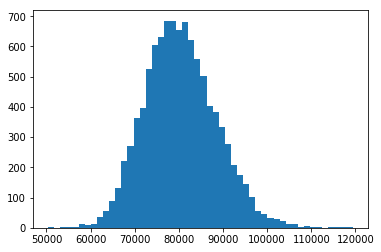

In [85]:
# Question 2
initial_income = income_mat[0]
plt.hist(initial_income, bins=50)

greater_than_100000_count = 0
for income in initial_income:
    if income > 100000:
        greater_than_100000_count += 1
greater_than_100000_ratio = greater_than_100000_count/10000
print(greater_than_100000_ratio)

smaller_than_70000_count = 0
for income in initial_income:
    if income < 70000:
        smaller_than_70000_count += 1
smaller_than_70000_ratio = smaller_than_70000_count/10000
print(smaller_than_70000_ratio)

In [63]:
# Question 2
# 1.27% of the class will earn more than $100,000 in the first year, and 9.02% will earn less than
# $70,000 in the first year. 
# The distribution is not normally distrubuted.

(array([  4.00000000e+00,   1.84300000e+03,   7.95200000e+03,
          2.01000000e+02]),
 array([  9.  ,   9.75,  10.5 ,  11.25,  12.  ]),
 <a list of 4 Patch objects>)

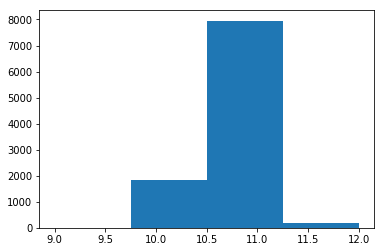

In [89]:
# Question 3
pay_year = find_pay_year_array(p)
years = []
for year in pay_year:
    if year not in years:
        years.append(year)
plt.hist(pay_year, bins = len(years))

In [90]:
# Question 3
in_10_years_ratio = find_in_10_years_ratio(p)
print(in_10_years_ratio)

0.1847


In [66]:
# Question 3
# 18.47% of the simulations are able to pay off the loan oin 10 years.

(array([    7.,   719.,  6294.,  2925.,    55.]),
 array([  8. ,   8.8,   9.6,  10.4,  11.2,  12. ]),
 <a list of 5 Patch objects>)

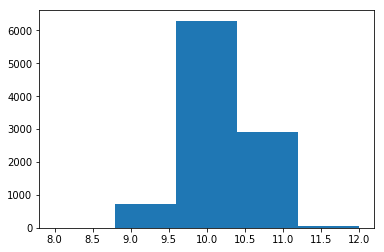

In [91]:
# Question 4
simulation_profile_2 = {
         'inc_0':       85000,
         'sigma':       0.15,
         'mu':          0,
         'rho':         0.2,
         'gr':          0.03,
         'start_yr':    2019,
         'working_yrs': 40,
         'num_draws':   10000,
    }
p = simulation_profile_2
pay_year = find_pay_year_array(p)
years = []
for year in pay_year:
    if year not in years:
        years.append(year)
plt.hist(pay_year, bins = len(years))

In [92]:
# Question 4
in_10_years_ratio = find_in_10_years_ratio(p)
print(in_10_years_ratio)

0.702


In [30]:
# Question 4
# 70.2% of the simulations are able to pay off the loan in 10 years.

In [ ]:
# References:
# 1. (2017, Nov 5). How to plot histogram from array in Python?. Stack Overflow. Retrieved from\
#     https://stackoverflow.com/questions/40316636/how-to-plot-histogram-from-array-in-python
# 2. jmausolf (2017, Nov 3) Simulation example. Github. Retrieved from \
#     https://github.com/UC-MACSS/persp-analysis/blob/master/labs/Python_Simulation_Lab.ipynb
# 3. (2015) Histograms in matplotlib. Plotly. Retrieved from https://plot.ly/matplotlib/histograms/